In [6]:
from __future__ import print_function
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
import seaborn as sns
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [7]:
data = sm.datasets.spector.load_pandas()
exog = data.exog
endog = data.endog
exog = sm.add_constant(exog, prepend=True)
print(sm.datasets.spector.NOTE)
print(data.exog.head())

::

    Number of Observations - 32

    Number of Variables - 4

    Variable name definitions::

        Grade - binary variable indicating whether or not a student's grade
                improved.  1 indicates an improvement.
        TUCE  - Test score on economics test
        PSI   - participation in program
        GPA   - Student's grade point average

    GPA  TUCE  PSI
0  2.66    20    0
1  2.89    22    0
2  3.28    24    0
3  2.92    12    0
4  4.00    21    0


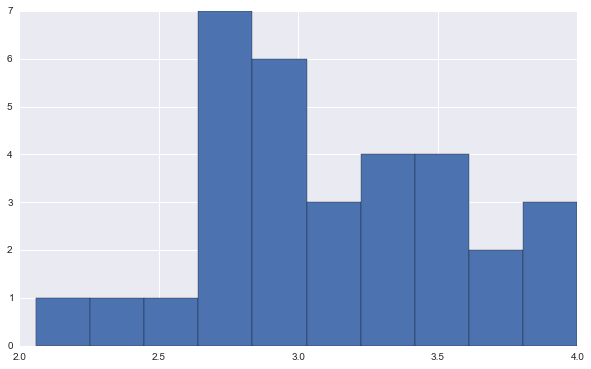

In [9]:
data.exog.GPA.hist()

In [10]:
class MyProbit(GenericLikelihoodModel):
    def loglike(self, params):
        exog = self.exog
        endog = self.endog
        q = 2 * endog - 1
        return stats.norm.logcdf(q*np.dot(exog, params)).sum()

In [36]:
r=sm.OLS(endog,exog).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GRADE   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Fri, 10 Jun 2016   Prob (F-statistic):            0.00157
Time:                        18:00:54   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4980      0.524     -2.859      0.008      -2.571      -0.425
GPA            0.4639      0.162      2.864      0.008       0.132       0.796
TUCE           0.0105      0.019      0.539      0.594      -0.029       0.050
PSI            0.3786      0.139      2.720      0.011       0.093       0.664
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   2.346
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.167
Skew:                           0.141   Prob(JB):                        0.920
Kurtosis:                       2.786   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
sm_probit_manual = MyProbit(endog, exog).fit()
print(sm_probit_manual.summary())

Optimization terminated successfully.
         Current function value: 0.400588
         Iterations: 292
         Function evaluations: 494
                               MyProbit Results                               
Dep. Variable:                  GRADE   Log-Likelihood:                -12.819
Model:                       MyProbit   AIC:                             33.64
Method:            Maximum Likelihood   BIC:                             39.50
Date:                Fri, 10 Jun 2016                                         
Time:                        17:42:12                                         
No. Observations:                  32                                         
Df Residuals:                      28                                         
Df Model:                           3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

In [13]:
sm_probit_canned = sm.Probit(endog, exog).fit()

Optimization terminated successfully.
         Current function value: 0.400588
         Iterations 6


In [25]:
sm_probit_canned.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                         Probit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Fri, 10 Jun 2016   Pseudo R-squ.:                  0.3775
Time:                        17:49:39   Log-Likelihood:                -12.819
converged:                       True   LL-Null:                       -20.592
                                        LLR p-value:                  0.001405
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4523      2.542     -2.931      0.003     -12.435      -2.469
GPA            1.6258      0.694      2.343      0.019       0.266       2.986
TUCE           0.0517      0.084      0.617      0.537      -0.113       0.216
PSI            1.4263      0.595      2.397      0.017       0.260       2.593
==============================================================================
"""

In [15]:
print(sm_probit_canned.params)
print(sm_probit_manual.params)

const   -7.452320
GPA      1.625810
TUCE     0.051729
PSI      1.426332
dtype: float64
[-7.45233176  1.62580888  0.05172971  1.42631954]


In [16]:
print(sm_probit_canned.cov_params())
print(sm_probit_manual.cov_params())

          const       GPA      TUCE       PSI
const  6.464166 -1.169668 -0.101173 -0.594792
GPA   -1.169668  0.481473 -0.018914  0.105439
TUCE  -0.101173 -0.018914  0.007038  0.002472
PSI   -0.594792  0.105439  0.002472  0.354070
[[  6.46416770e+00  -1.16966617e+00  -1.01173180e-01  -5.94788993e-01]
 [ -1.16966617e+00   4.81472116e-01  -1.89134586e-02   1.05438227e-01]
 [ -1.01173180e-01  -1.89134586e-02   7.03758392e-03   2.47189191e-03]
 [ -5.94788993e-01   1.05438227e-01   2.47189191e-03   3.54069512e-01]]
